# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get API url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Create empty lists for data frame columns
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
newcity = []

# Fetch data
# Make sense to use average temperature instead of max temperature, but API_key is about to out of limits so did not re-run
time.sleep(1)
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&units={units}&q="
        city_json = requests.get(query_url+city).json()
        
        Cloudiness.append(city_json["clouds"]["all"])
        Country.append(city_json["sys"]["country"])
        Date.append(city_json["dt"])
        Humidity.append(city_json["main"]["humidity"])
        Lat.append(city_json["coord"]["lat"])
        Lng.append(city_json["coord"]["lon"])
        Max_Temp.append(city_json["main"]["temp_max"]) #here use temp instead of temp_max
        Wind_Speed.append(city_json["wind"]["speed"])
        newcity.append(city_json["name"])
        print(f"Processing Record | {city}")
    except KeyError:
        print("City not found. Skipping...")

Processing Record | kapaa
Processing Record | rikitea
Processing Record | ushuaia
Processing Record | bastia
Processing Record | albany
City not found. Skipping...
Processing Record | acajutla
Processing Record | maniitsoq
Processing Record | hasaki
Processing Record | saskylakh
Processing Record | barrow
City not found. Skipping...
Processing Record | ayan
Processing Record | meadow lake
Processing Record | port elizabeth
Processing Record | hithadhoo
Processing Record | pidigan
Processing Record | punta arenas
City not found. Skipping...
Processing Record | vuktyl
Processing Record | puerto ayora
Processing Record | charagua
Processing Record | mandan
Processing Record | castro
Processing Record | oranjemund
Processing Record | la ronge
Processing Record | airai
Processing Record | upernavik
Processing Record | bredasdorp
Processing Record | yellowknife
Processing Record | port alfred
Processing Record | butaritari
Processing Record | isla vista
Processing Record | mataura
Processing

Processing Record | berlevag
City not found. Skipping...
Processing Record | batemans bay
Processing Record | geraldton
City not found. Skipping...
Processing Record | nouadhibou
Processing Record | ghanzi
Processing Record | alberton
Processing Record | rabat
Processing Record | beterou
Processing Record | anadyr
Processing Record | vilhena
Processing Record | vao
Processing Record | mehamn
Processing Record | cap malheureux
Processing Record | sitka
Processing Record | carnarvon
City not found. Skipping...
City not found. Skipping...
Processing Record | srednekolymsk
Processing Record | campos altos
Processing Record | laurel
Processing Record | dalby
Processing Record | namatanai
Processing Record | lucea
Processing Record | klaksvik
Processing Record | victoria
Processing Record | portland
Processing Record | pevek
City not found. Skipping...
Processing Record | batagay-alyta
Processing Record | verkhoyansk
Processing Record | don sak
Processing Record | samarai
Processing Record |

Processing Record | athabasca
Processing Record | brae
Processing Record | alyangula
Processing Record | porto novo
Processing Record | vvedenskoye
Processing Record | corrales
Processing Record | pyay
Processing Record | barcelos
City not found. Skipping...
Processing Record | tadine
Processing Record | novouzensk
Processing Record | vaitape
Processing Record | keelung
Processing Record | pangody
Processing Record | poum
Processing Record | osa
Processing Record | tandil
Processing Record | sawai madhopur
Processing Record | saint-joseph
Processing Record | sabang
Processing Record | gamba
Processing Record | aquiraz
City not found. Skipping...
Processing Record | ahipara
Processing Record | honiara
Processing Record | mayo
Processing Record | las vegas
City not found. Skipping...
Processing Record | petukhovo
Processing Record | ternate
Processing Record | taltal
Processing Record | kloulklubed
Processing Record | aksu
Processing Record | goderich
Processing Record | itoman
Processin

In [5]:
# Create data frame using key variables fetched above
city_df = pd.DataFrame(
{'City': newcity,
'Cloudiness':Cloudiness,
 'Country':Country,
 'Date':Date,
 'Humidity':Humidity,
 'Lat':Lat,
 'Lng':Lng,
 'Max Temp':Max_Temp,
 'Wind Speed':Wind_Speed})

In [6]:
# Drop any error data just in case
city_df = city_df.dropna(how="any")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export data frame to csv file
city_df.to_csv("city.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'City Latitude vs. Max Temperature (08/22/18)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Max Temperature (F)')

(-59.81, 83.22)

(-7.029999999999999, 45.0)

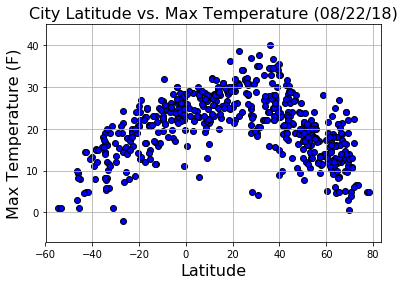

In [8]:
# Plotting using scatter plot and formatting plot for correlation question 1
# Negative correlation shows betwen temperature and absolute value of latitude
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Max Temperature (08/22/18)", fontsize=16)
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (F)", fontsize=16)
plt.xlim((min(city_df["Lat"]))-5, (max(city_df["Lat"]))+5)
plt.ylim(min(city_df["Max Temp"])-5, max(city_df["Max Temp"])+5)

plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

Text(0.5,1,'City Latitude vs. Humidity (08/22/18)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Humidity (%)')

(-59.81, 83.22)

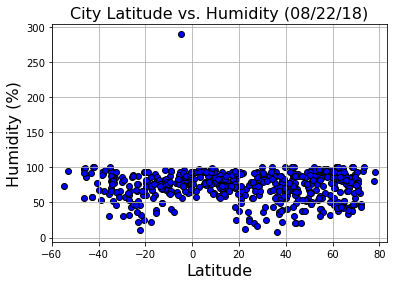

In [10]:
# Plotting using scatter plot and formatting plot for correlation question 2
# There is one outlier but correlation result still holds 
# Latitude near 0 has humidity more concentrated above 50%, but locations at other latitudes have humidity spreading out)
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Humidity (08/22/18)", fontsize=16)
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.xlim((min(city_df["Lat"]))-5, (max(city_df["Lat"]))+5)
plt.ylim(min(city_df["Humidity"])-5, max(city_df["Humidity"])+5)

plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'City Latitude vs. Cloudiness (08/22/18)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Cloudiness (%)')

(-59.81, 83.22)

(-5, 105)

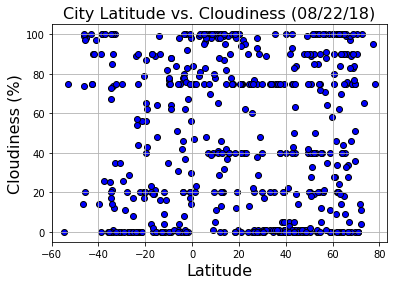

In [11]:
# Plotting using scatter plot and formatting plot for correlation question 3
# No significant correlation between latitude and cloudiness, but cloudiness level 0%, 20%, 40%, 80% and 100% are more frequent
plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Cloudiness (08/22/18)", fontsize=16)
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.xlim((min(city_df["Lat"]))-5, (max(city_df["Lat"]))+5)
plt.ylim(min(city_df["Cloudiness"])-5, max(city_df["Cloudiness"])+5)

plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'City Latitude vs. Wind Speed (08/22/18)')

Text(0.5,0,'Latitude')

Text(0,0.5,'Wind Speed (mph)')

(-59.81, 83.22)

(-0.42, 13.9)

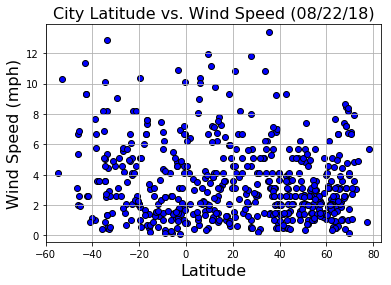

In [13]:
# Plotting using scatter plot and formatting plot for correlation question 4
# No significant correlation between latitude and wind speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Wind Speed (08/22/18)", fontsize=16)
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed (mph)", fontsize=16)
plt.xlim((min(city_df["Lat"]))-5, (max(city_df["Lat"]))+5)
plt.ylim(min(city_df["Wind Speed"])-.5, max(city_df["Wind Speed"])+.5)

plt.grid()
plt.show()